#### Histogram Equalization

##### Importing the required libraries

In [ ]:
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt


##### Read the image

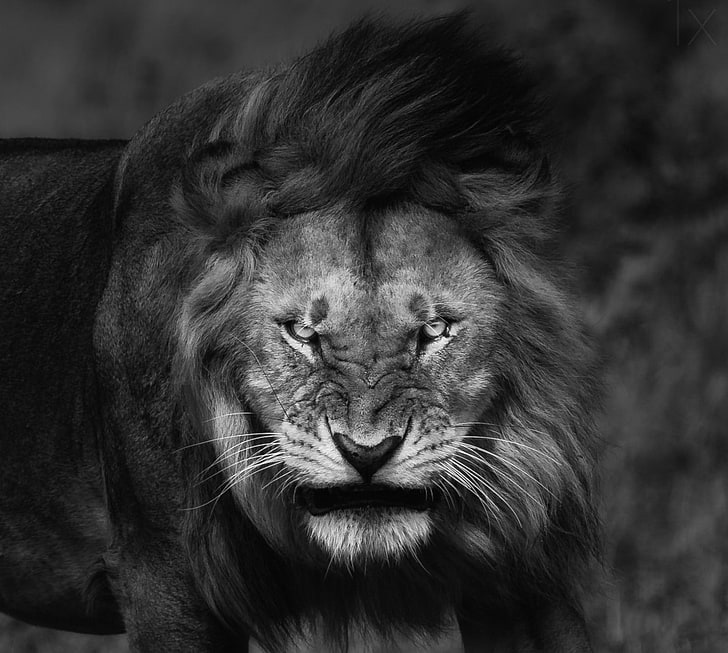

In [ ]:
img = cv2.imread('l.jpg',0)
cv2.imwrite('l.jpg', img)
display(Image(filename='l.jpg'))

##### Histogram of the original image

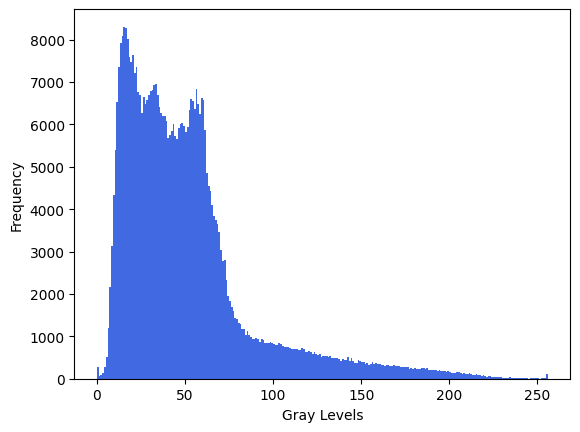

In [ ]:
plt.subplot(1,1,1)
plt.hist(x = img.flatten(), bins = 256, range = [0,256], color='royalblue')
plt.xlabel('Gray Levels')
plt.ylabel('Frequency')
plt.show()

##### Dimensions of the image

In [ ]:
M = img.shape[0]
N = img.shape[1]
MN = M*N
MN

475384

##### Creating a dictionary to store the pixel count, probability, cdf and new scaled values for different intensity levels

In [ ]:
image_data = {'Intensity':[], 'Count':[], 'Probability':[], 'CDF':[], 'New':[], 'New_Rounded':[]}

for i in range(256):
    image_data['Intensity'].append(i)
    image_data['Count'].append(0)
    image_data['Probability'].append(0)
    image_data['CDF'].append(0)
    image_data['New'].append(0)
    image_data['New_Rounded'].append(0)

##### Find the pixel count for each intensity level

In [ ]:
img_flatten = img.flatten()
for i in range(len(img_flatten)):
    image_data['Count'][img_flatten[i]] +=1

In [ ]:
max(image_data['Count'])

8302

##### Calculate the probability of each intensity level

In [ ]:
for i in range(256):
    image_data['Probability'][i] = (image_data['Count'][i])/(MN)

##### Calculate the cdf of each intensity level

In [ ]:
for i in range(1,256):
    image_data['CDF'][i] = image_data['CDF'][i-1] + image_data['Probability'][i]

##### Calculate the new scaled intensity levels

In [ ]:
for i in range(256):
    image_data['New'][i] = 255*(image_data['CDF'][i])
    image_data['New_Rounded'][i] = round(image_data['New'][i])

In [ ]:
import pandas as pd
df = pd.DataFrame(image_data)
df

,Intensity,Count,Probability,CDF,New,New_Rounded
0,0,282,0.000593,0.000000,0.000000,0
1,1,75,0.000158,0.000158,0.040231,0
2,2,86,0.000181,0.000339,0.086362,0
3,3,139,0.000292,0.000631,0.160923,0
4,4,282,0.000593,0.001224,0.312190,0
...,...,...,...,...,...,...
251,251,4,0.000008,0.999125,254.776854,255
252,252,10,0.000021,0.999146,254.782218,255
253,253,9,0.000019,0.999165,254.787046,255
254,254,8,0.000017,0.999182,254.791337,255


##### Replace the old intensity levels with the new intensity levels

In [ ]:
img_copy = np.copy(img)
for i in range(len(img)):
    for j in range(len(img[i])):
        img_copy[i][j] = image_data['New_Rounded'][img[i][j]]

##### Display the new image

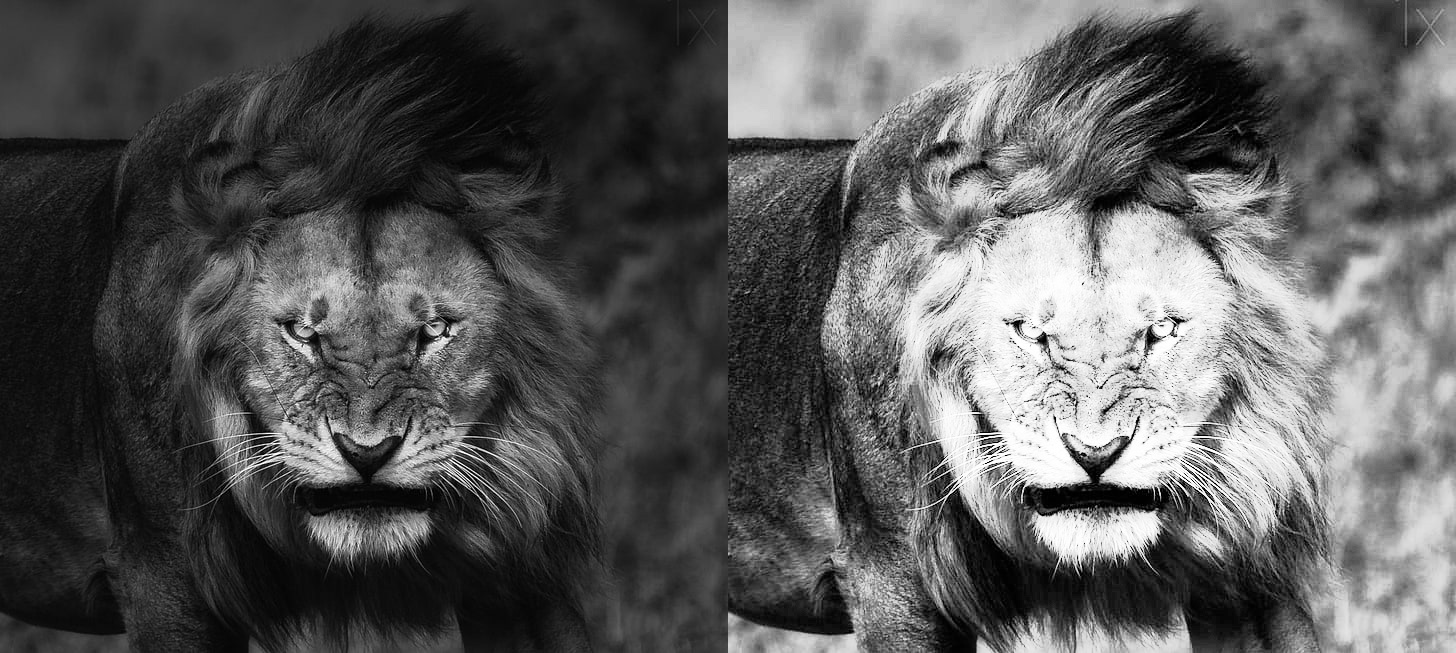

In [ ]:
compare = cv2.hconcat([img, img_copy])

# Save the image to a temporary file
temp_image_path = 'compare.jpg'
cv2.imwrite(temp_image_path, compare)

# Display the image in the output of the current cell
display(Image(filename=temp_image_path))

##### Histogram comparison between the old and new image

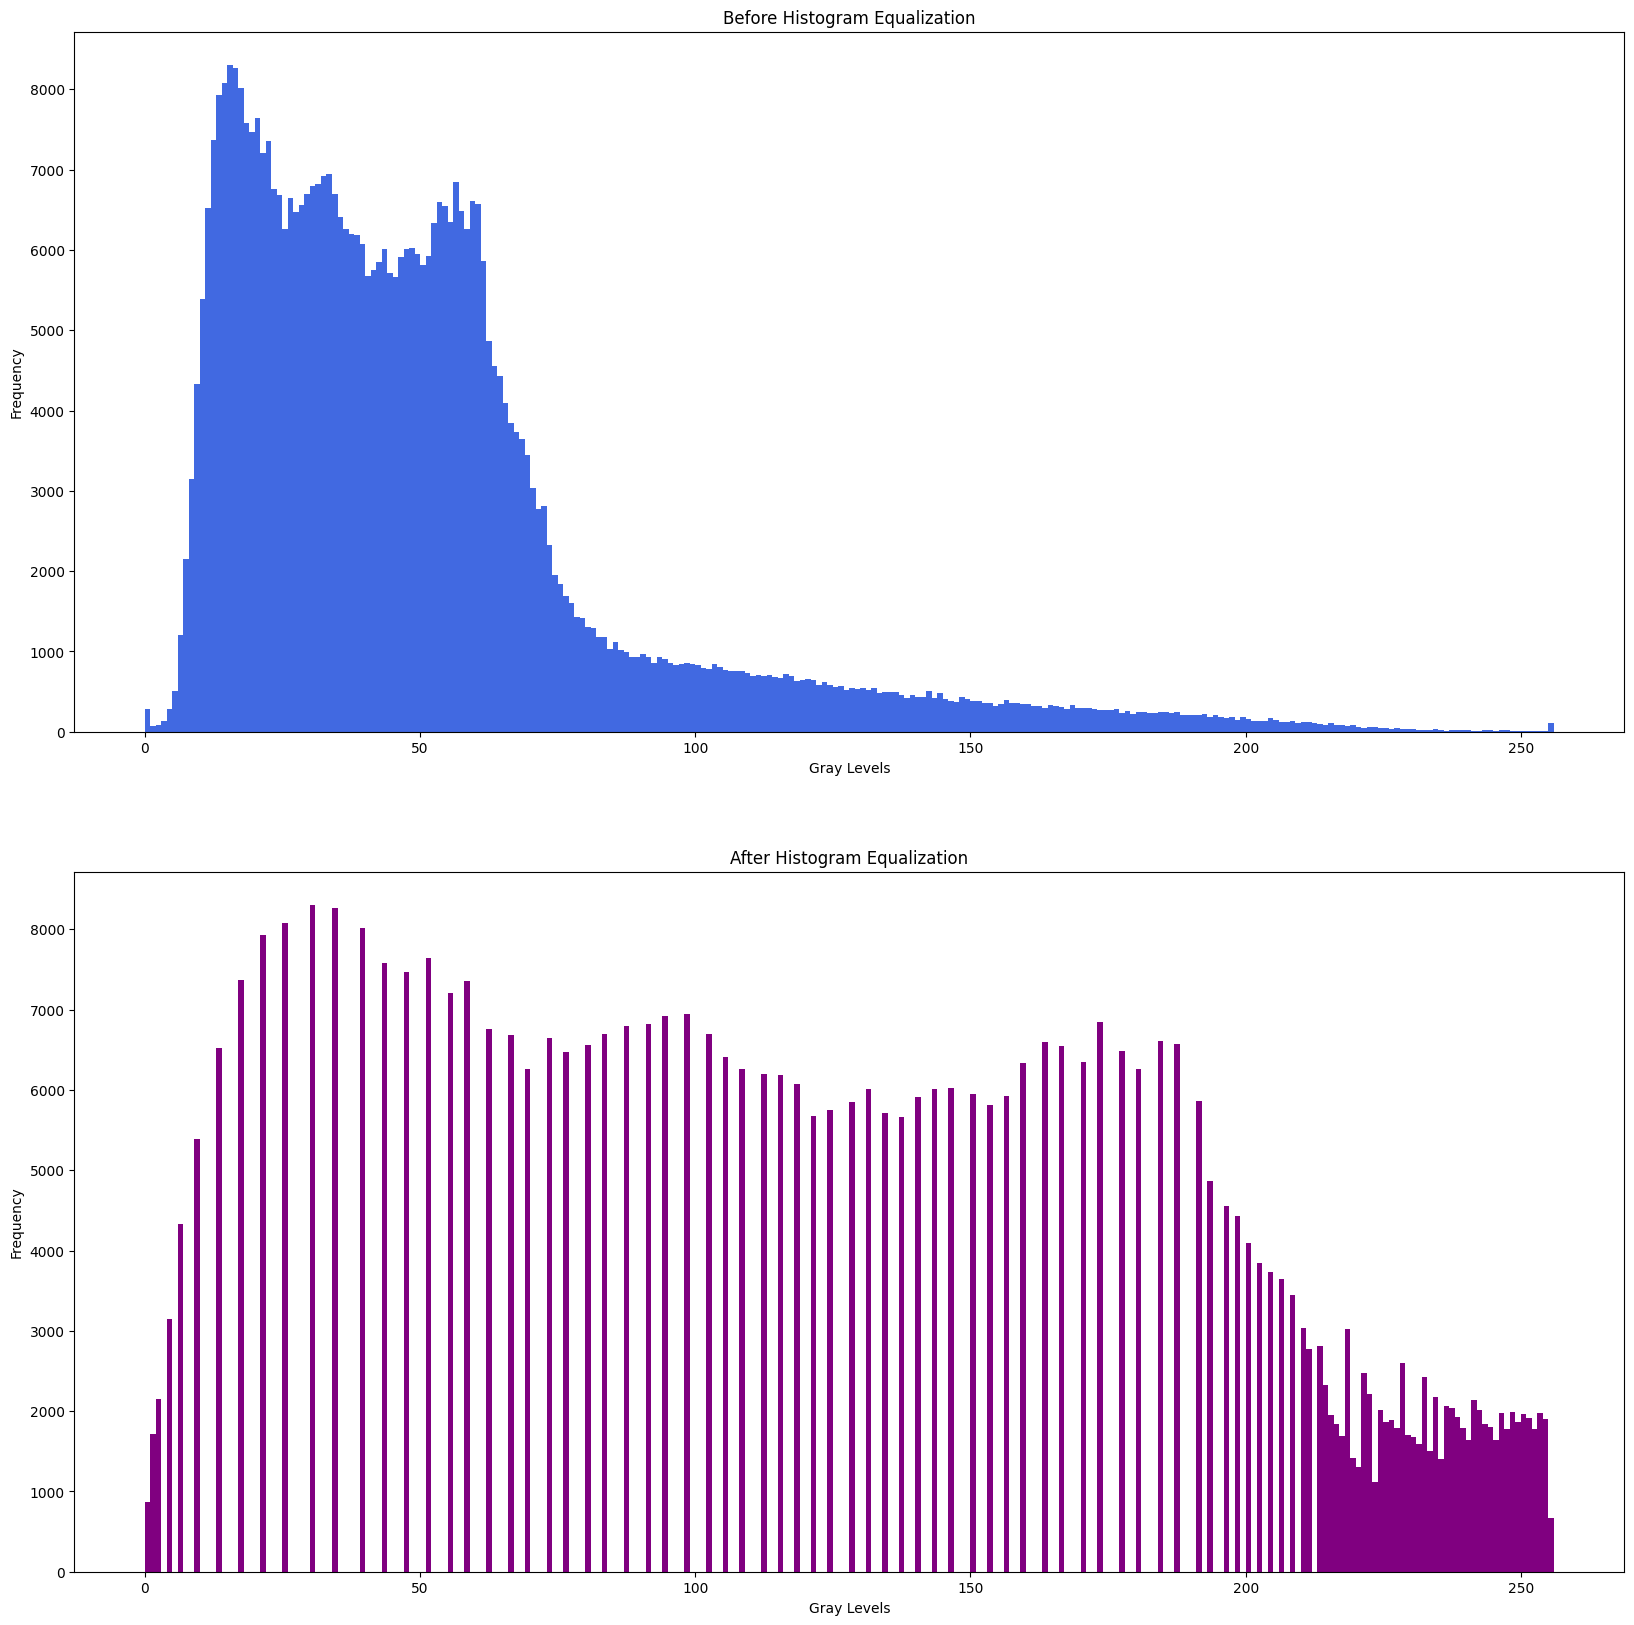

In [ ]:
plt.subplots(2,1,figsize = (20,20))

plt.subplot(2,1,1)
plt.hist(x = img.flatten(), bins = 256, range = [0,256], color='royalblue')
plt.title('Before Histogram Equalization')
plt.xlabel('Gray Levels')
plt.ylabel('Frequency')

plt.subplot(2,1,2)
plt.hist(x = img_copy.flatten(), bins = 256, range = [0,256], color='purple')
plt.title('After Histogram Equalization')
plt.xlabel('Gray Levels')
plt.ylabel('Frequency')
plt.show()